In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import numpy as np

In [2]:
df=pd.read_csv("cdata.csv")
df.head()

,x,y,cluster
0,2.1364,0.8369,1
1,7.4096,-1.4137,3
2,5.0996,1.1552,0
3,7.8149,-1.0186,3
4,1.8925,1.2714,1


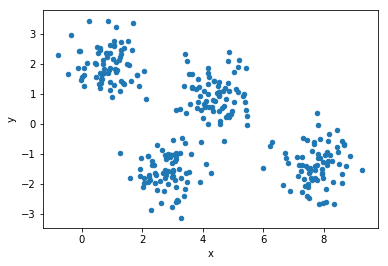

In [3]:
#先劃出點的散布圖觀察

#plt.plot(df.x,df.y,'.')
#plt.xlabel('x')
#plt.ylabel('y')
"""
#依據cluster做標點
#color=str.maketrans('0','r')#str.maketrans('1','g'),str.maketrans('2','b'),str.maketrans('3','y')
#df.cluster.translate(color) #pandas的dataframe可以直接做matplot
#但series不能translate

#-->用map
color={0:'r',1:'y',2:'g',3:'b'}
df['color']=df['cluster'].map(color)
#df.head()
df.plot.scatter(x='x',y='y',c=df['color'])
"""
df.plot.scatter(x='x',y='y')
#df.plot.scatter(x=df.x[c_1],y=df.y[c_1],'x')

In [13]:
#隨機選出起始centroid
import random
k=4
c_1=random.sample(range(len(df)),k)
c=dict(zip(df.x[c_1],df.y[c_1]))
c

{0.4548: 2.0407, 0.6017: 1.2008, 2.0552: -1.9854, 3.8585: 1.4949}

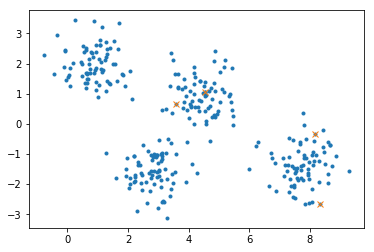

In [6]:
plt.plot(df.x,df.y,'.')
plt.plot(df.x[c_1],df.y[c_1],'x')

In [6]:
#cluster的方法:計算出各點離哪個centroid距離最小)
import math
def cluster(x,y,c):
    #參數:df.x,df.y,c
    s=dict(zip(x,y))
    min_d=[]
    for i in s:
        d=[]
        for j in c:
            d.append(math.pow((math.pow((i-j),2)+math.pow((s[i]-c[j]),2)),0.5))
        min_d.append(d.index(min(d)))
    df['pre_cluster']=min_d  
    color={0:'r',1:'y',2:'g',3:'b'}
    df['color']=df['pre_cluster'].map(color)
    df.plot.scatter(x='x',y='y',c=df['color'])
    plt.plot(c.keys(),c.values(),'x',c='k')
    print(df.head())


In [7]:
#重新計算出新的centroid
import numpy as np

def centroid(x,y,k,c):
    c.clear()
    #參數是df.x,df.y,k
    #建立新的k個centroid的座標
    c_x=[]
    c_y=[]
    for i in range(k):
        c_x.append(np.mean(list(x[df.pre_cluster==i])))
        c_y.append(np.mean(list(y[df.pre_cluster==i])))
    c=dict(zip(c_x,c_y))
    return c


        x       y  cluster  pre_cluster color
0  2.1364  0.8369        1            1     y
1  7.4096 -1.4137        3            0     r
2  5.0996  1.1552        0            2     g
3  7.8149 -1.0186        3            0     r
4  1.8925  1.2714        1            1     y


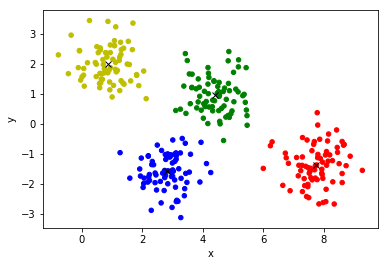

In [12]:
cluster(df.x,df.y,c)
c=centroid(df.x,df.y,k,c)

In [71]:
#以下為方法2 用class做
#優點是方法都被建置在同一類中 因此變數成為類的屬性 可以共用 (上面那樣各自分開的方法中 變數為local的 無法成為global而共用)
class k_means(object):
    #initialize
    #self:class本身 必為方法的第一個參數
    def __init__(self,x,y,k): #底線為超長版的
        self.x=x
        self.y=y
        self.k=k
        #self.c_l=list(self.c.items())
        self.d_min=[]
        self.SSE
        #self.c
        
    #隨機建立k個centroid
    def creat_centroid(self):
        c_1=random.sample(range(len(df)),self.k)
        self.c=dict(zip(df.x[c_1],df.y[c_1]))
        return self.c
    
    #重新cluster
    def cluster(self):#self一定要留著
        s=dict(zip(self.x,self.y))
        min_d=[]
        for i in s:
            d=[]
            for j in self.c:
                d.append(math.pow((math.pow((i-j),2)+math.pow((s[i]-self.c[j]),2)),0.5))
            min_d.append(d.index(min(d)))
            self.d_min.append(min(d))
        df['pre_cluster']=min_d
       # if self.k==4:
        #    color={0:'r',1:'y',2:'g',3:'b'}
         #   df['color']=df['pre_cluster'].map(color)
          #  df.plot.scatter(x='x',y='y',c=df['color'])
           # plt.plot(self.c.keys(),self.c.values(),'x',c='k')
        
    #重新計算centroid
    def re_centroid(self):
        self.c.clear()
        c_x=[]
        c_y=[]
        for i in range(self.k):
            c_x.append(np.mean(list(self.x[df.pre_cluster==i])))
            c_y.append(np.mean(list(self.y[df.pre_cluster==i])))
        self.c=dict(zip(c_x,c_y))
    
    #持續更新分類直到收斂
    def converge(self):
        while True:
            self.cluster() #self就是類本身 所以這個類的method-->self.method()
            c_=set(self.c.items()) #不管順序，所以用set
            self.re_centroid()
            if set(self.c.items())==c_: #set內容物是否相同-->用==
                break
        print("ok")
        #color={0:'r',1:'y',2:'g',3:'b'}
        #df['color']=df['pre_cluster'].map(color)
        #for i in range(self.k):
        #    plt.scatter(x=df.x,y=df.y)
        #plt.plot(self.c.keys(),self.c.values(),'x',c='k')
    
    #計算SSE
    def SSE(self):
        #self.SSE=sum(self.d)
        #return self.SSE
        #for i in range(self.k):
        #    for j in range(len(self.x[df.pre_cluster==i])):
        #        SSE+=((math.pow(list(self.x[df.pre_cluster==i])[j]-self.c_l[i][0],2))
        #              +(math.pow(list(self.y[df.pre_cluster==i])[j]-self.c_l[i][1],2)))
        #return SSE
        SSE=[]
        for i in range(len(self.d_min)):
            SSE.append(math.pow(self.d_min[i],4))
        self.SSE=sum(SSE)
        return self.SSE   
            

In [72]:
#建立一個物件 其參數為__int__的參數
km1=k_means(df.x,df.y,4) 

In [83]:
#先執行建立起始centroid
km1.creat_centroid()

{3.4312: 2.3381, 6.839: -1.3145, 7.306: -0.4568, 7.6949: -0.5904}

In [84]:
#在執行持續更新分類直到收斂
km1.converge()

ok


In [85]:
km1.SSE()

TypeError: 'float' object is not callable

In [9]:
#第二題：是建立k_means的k=2~50個物件
#針對k=2~50個物件進行操作
km=[]
for k in range(2,51):
    km.append(k_means(df.x,df.y,k))
    km[k-2].creat_centroid()



In [10]:
#更新直到收斂的方法一:
for i in range(2,51):
    km[i-2].converge()

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


In [20]:
#更新直到收斂的方法二：
for i in range(49):
    for j in range(10):
        km[i].cluster()
        km[i].centroid()

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [19]:
###更新直到收斂的方法三：不!這個會跑超久 看不見盡頭
for i in range(49):
    while True:
        km[i].cluster()
        c_=set(km[i].c.items())
        km[i].centroid()
        if set(km[i].c.items())==c_:
            break

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

In [11]:
#得到SSE
SSE=[]
for i in range(2,51):
    SSE.append(km[i-2].SSE())
SSE

[428959.3915775174,
 69346.26641430258,
 16071.033758140153,
 6180.554613575678,
 2967.0766035285965,
 8632.959846950489,
 1920.787954200757,
 4715.618030293911,
 1144.2411098481084,
 1411.5092334603755,
 1213.481831093161,
 1598.432773558001,
 795.3464212149469,
 660.7825387866817,
 656.8638162798983,
 801.4324170995936,
 328.7319647289076,
 855.3511310133484,
 544.4468664214969,
 306.47100129121355,
 383.267512610523,
 306.53166749510234,
 375.4478245426463,
 398.7923805126913,
 367.1114342365847,
 244.823649264725,
 179.2112855265435,
 298.31869390148086,
 284.96510521726924,
 283.77298699306533,
 152.53747468157178,
 142.13033333893134,
 152.22653388463738,
 135.93685263123604,
 160.20202863676448,
 118.08587204306401,
 112.13005564835828,
 91.80531650018722,
 107.92830972714899,
 114.11957171610233,
 117.46394813358799,
 72.37558557199299,
 115.4539869477541,
 68.06702151219837,
 69.30407331736252,
 82.67377808211131,
 48.738355232994984,
 55.58483867792788,
 59.964933311116624]

In [12]:
k=list(range(2,51))
k

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

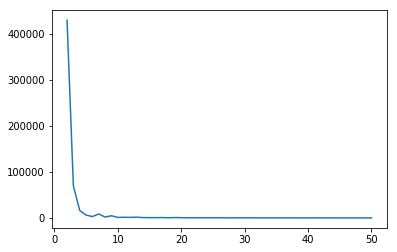

In [13]:
#畫圖:k-SSE
plt.plot(k,SSE)

In [88]:
#第三題：隨機建立10次10個centroid並做kmeans，已得到SSE
SSE=[]
km10=[]
for i in range(10):
    km10.append(k_means(df.x,df.y,10))
    km10[i].creat_centroid()
    km10[i].converge()
    SSE.append(km10[i].SSE())
SSE

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


[1518.1873298297376,
 1682.5835804629492,
 13539.619700089981,
 966.2603410548976,
 1895.6134850056985,
 886.2047083537556,
 1718.396166196644,
 1453.217491212778,
 1311.291958681923,
 11078.025744674262]

<Container object of 10 artists>

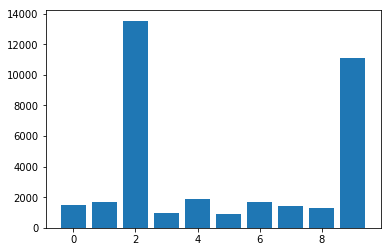

In [89]:
#畫圖 次數vsSSE
plt.bar(range(10),SSE)

Text(0,0.5,'distortion')

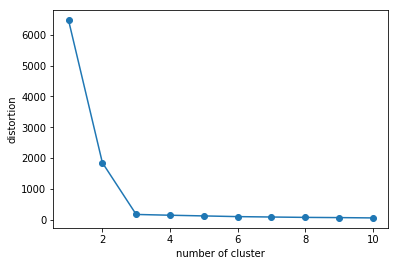

In [5]:
#用KMeans模組做clustering、elbow method
from sklearn.datasets import make_blobs
X,y=make_blobs(random_state=42)

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit_predict(X)

distortion=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(X)
    distortion.append(km.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1,11),distortion,marker='o')
plt.xlabel('number of cluster')
plt.ylabel('distortion')


In [102]:
#copy模組
#有copr、deepcopy兩種方法
import copy
a=['aa',22,[1,2,3]]
#.copy是淺拷貝:是建立另一個物件，而其子物件是共用的(引用)(一起改)
b=copy.copy(a)
#.deepcopy是深拷貝:建立另一個物件，而其子物件也被完全拷貝過去形成新的獨立物件(彼此完全獨立)
c=copy.deepcopy(a)

In [103]:
a[2][1]=1000
a[1]='eeeee' #物件的屬性不是物件，所以不會彼此改到拷貝的物件屬性

In [106]:
print(id(a),id(a[1]),id(a[2]),a)
print(id(b),id(b[1]),id(b[2]),b)
print(id(c),id(c[1]),id(c[2]),c)

2201369281608 2201397834000 2201406115720 ['aa', 'eeeee', [1, 1000, 3]]
2201401729864 1772253312 2201406115720 ['aa', 22, [1, 1000, 3]]
2201403828872 1772253312 2201401729992 ['aa', 22, [1, 2, 3]]


In [107]:
b[2][0]=4
print(a,b)

['aa', 'eeeee', [4, 1000, 3]] ['aa', 22, [4, 1000, 3]]


In [108]:
b[1]=333
print(a,b)

['aa', 'eeeee', [4, 1000, 3]] ['aa', 333, [4, 1000, 3]]
